In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
from mindsdb_native import Predictor, MySqlDS

S3 Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Microsoft SQL Server Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Athena Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Google Cloud Storage Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]


DEBUG:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\helpers\general_helpers.py:125 - MindsDB is up to date!



In [3]:
mysql_ds = MySqlDS(query="SELECT * FROM covid_flu_data", user="root", password="pass", database="world", port=3306)

### dividing mysql_ds into test & train randomly

In [4]:
train_data=mysql_ds.sample(frac=0.5)
train_data.shape

(22226, 21)

In [5]:
test_data=mysql_ds.drop(train_data.index)
test_data.shape

(22227, 21)

In [6]:
mdb = Predictor(name='covid_predictor')

DEBUG:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\helpers\general_helpers.py:125 - MindsDB is up to date!



### fitting the model

In [7]:
mdb.learn(from_data=train_data, to_predict='DIAGNOSE')


INFO:mindsdb-logger-abe48ff9-bc89-11eb-8419-cc2f71a1d951---ca9ecada-0227-4dbe-827c-0865fbd3c985:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:51 - [START] DataExtractor

INFO:mindsdb-logger-abe48ff9-bc89-11eb-8419-cc2f71a1d951---ca9ecada-0227-4dbe-827c-0865fbd3c985:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:56 - [END] DataExtractor, execution time: 0.285 seconds

INFO:mindsdb-logger-abe48ff9-bc89-11eb-8419-cc2f71a1d951---ca9ecada-0227-4dbe-827c-0865fbd3c985:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:51 - [START] DataCleaner

INFO:mindsdb-logger-abe48ff9-bc89-11eb-8419-cc2f71a1d951---ca9ecada-0227-4dbe-827c-0865fbd3c985:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:56 - [END] DataCleaner, execution time: 0.077 seconds

INFO:mindsdb-logger-abe48ff9-bc89-11eb-8419-cc2f71a1d951---ca9ecada-0227-4dbe-827c-0865fbd3c985:C:\Users\

### predicting the data

In [8]:
predictions = mdb.predict(when_data=test_data)

INFO:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:51 - [START] DataExtractor

INFO:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:56 - [END] DataExtractor, execution time: 0.237 seconds

INFO:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:51 - [START] DataTransformer

INFO:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:56 - [END] DataTransformer, execution time: 0.215 seconds

INFO:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\phases\base_module.py:51 - [START] ModelInterface

INFO:lightwood.8884:Computing device used: cpu
INFO:lightwood.8884:Model predictions and decoding completed
INFO:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\minds

In [9]:
print(predictions[0])

* We are 84.0% confident the value of "DIAGNOSE" is ALLERGY


In [10]:
pred_output = [x['DIAGNOSE'] for x in predictions ]
real_output = list((test_data)['DIAGNOSE'])

### accuracy

In [11]:
accuracy = accuracy_score(real_output, pred_output)
accuracy

0.9283753992891528

### confusion matrix

In [12]:
cm=confusion_matrix(real_output, pred_output)
print(cm)

[[ 8065    65    10    27]
 [  188   267    23    72]
 [    3     8   521   509]
 [   46    98   543 11782]]


In [13]:
classes=['FLU', 'ALLERGY', 'COVID', 'COLD']

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001875833BC40>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001875833BC40>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaV

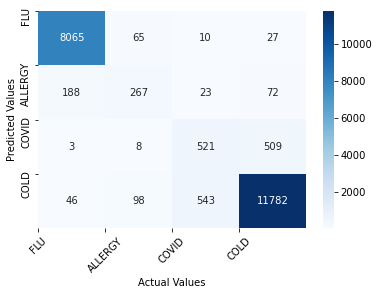

In [14]:
#visualising confusion matrix
sns.heatmap(cm, annot=True,fmt='g',cmap='Blues')
width = np.arange(len(classes))
plt.xticks(width, classes, rotation=45)
plt.yticks(width, classes)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### precision score
For the whole model

In [15]:
ps=precision_score(real_output, pred_output,average='weighted')
print(ps)

0.9277300138173091


### recall score
For the whole model

In [16]:
rs=recall_score(real_output, pred_output,average='weighted')
print(rs)

0.9283753992891528


In [17]:
precision, recall, fscore, support = score(real_output, pred_output)

In [18]:
print('precision: {}'.format(precision))
print('recall:    {}'.format(recall))
print('fscore:    {}'.format(fscore))
print('support:   {}'.format(support))

precision: [0.97145266 0.60958904 0.47493163 0.95092817]
recall:    [0.98751071 0.48545455 0.50048031 0.94490336]
fscore:    [0.97941587 0.54048583 0.48737138 0.94790619]
support:   [ 8167   550  1041 12469]


In [19]:
score(real_output, pred_output,labels=['ALLERGY','COLD', 'COVID', 'FLU'])

(array([0.97145266, 0.60958904, 0.47493163, 0.95092817]),
 array([0.98751071, 0.48545455, 0.50048031, 0.94490336]),
 array([0.97941587, 0.54048583, 0.48737138, 0.94790619]),
 array([ 8167,   550,  1041, 12469], dtype=int64))